In [6]:
import pandas as pd
import numpy as np
import os
print(os.path.abspath('../'))

C:\Users\Sheikh M Muneer\Documents


In [7]:
# set the path where you have downloaded the data files
file_path = os.path.abspath('../class3/')
print(file_path)

train = pd.read_csv(file_path+'/train_income_data_AAII.csv')
test = pd.read_csv(file_path+'/test_income_data_AAII.csv')

# For windows, if the above paths doesn't works
# import os
# f_path = os.path.join(*['C:', 'Users', 'user', 'Desktop', 'train_income_data_AAII.csv'])
# train = pd.read_csv(f_path)

C:\Users\Sheikh M Muneer\Documents\class3


In [8]:
train.shape

(32561, 12)

In [9]:
train.head()

,ID,Age,Workclass,Education,Marital.Status,Occupation,Relationship,Race,Sex,Hours.Per.Week,Native.Country,Income.Group
0,1,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
1,2,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
2,3,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
3,4,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
4,5,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K


In [10]:
type(train)

pandas.core.frame.DataFrame

In [11]:
train.dtypes

ID                 int64
Age                int64
Workclass         object
Education         object
Marital.Status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Hours.Per.Week     int64
Native.Country    object
Income.Group      object
dtype: object

In [12]:
train.describe()

,ID,Age,Hours.Per.Week
count,32561.000000,32561.000000,32561.000000
mean,16281.000000,38.581647,40.437456
std,9399.695394,13.640433,12.347429
min,1.000000,17.000000,1.000000
25%,8141.000000,28.000000,40.000000
50%,16281.000000,37.000000,40.000000
75%,24421.000000,48.000000,45.000000
max,32561.000000,90.000000,99.000000


In [13]:
categorical = train.dtypes.loc[train.dtypes=='object'].index
categorical

Index(['Workclass', 'Education', 'Marital.Status', 'Occupation',
       'Relationship', 'Race', 'Sex', 'Native.Country', 'Income.Group'],
      dtype='object')

In [14]:
numerical = train.dtypes.loc[train.dtypes=='int64'].index
numerical

Index(['ID', 'Age', 'Hours.Per.Week'], dtype='object')

# There are three ways we can perform Multivariate Analysis

    categorical vs categorical </br>
    continuous vs continuous </br>
    categorical vs continuous </br>


### Analysis of Categorical vs Categorical Variables

In [15]:
cross_tab = pd.crosstab(train['Sex'],train['Income.Group']) # Give (Rows Column and Column Values Column)
print(cross_tab)

Income.Group  <=50K  >50K
Sex                      
Female         9592  1179
Male          15128  6662


In [16]:
cross_tab = pd.crosstab(train['Sex'],train['Income.Group'],margins=True)
print(cross_tab)

Income.Group  <=50K  >50K    All
Sex                             
Female         9592  1179  10771
Male          15128  6662  21790
All           24720  7841  32561


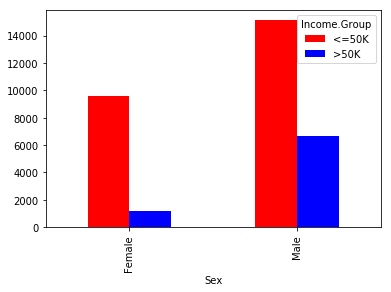

In [17]:
%matplotlib inline
cross_tab.iloc[:-1,:-1].plot(kind='bar',stacked=False, color=['red','blue'], grid=False)

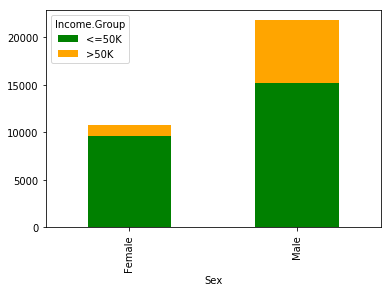

In [18]:
%matplotlib inline
cross_tab.iloc[:-1,:-1].plot(kind='bar',stacked=True, color=['Green','Orange'], grid=False)

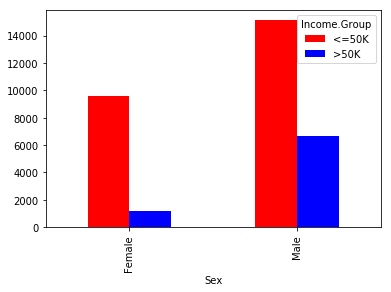

In [19]:
%matplotlib inline
cross_tab.iloc[:-1,:-1].plot(kind='bar',stacked=False, color=['Red','blue'], grid=False)

In [20]:
# Lets define the above figures and charts in percentage for better analysis and comparison

In [21]:
def convert_percent(ct_val):
    return ct_val/float(ct_val[-1])

In [45]:
cross_tab2 = cross_tab.apply(convert_percent,axis=1)

In [46]:
cross_tab2

Income.Group,<=50K,>50K,All
Sex,,,
Female,0.890539,0.109461,1.0
Male,0.694263,0.305737,1.0
All,0.759190,0.240810,1.0


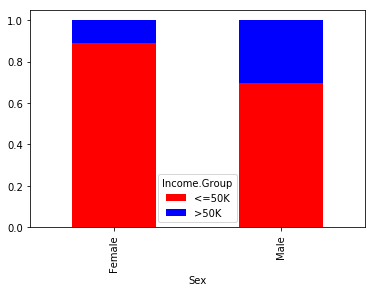

In [24]:
cross_tab2.iloc[:-1,:-1].plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

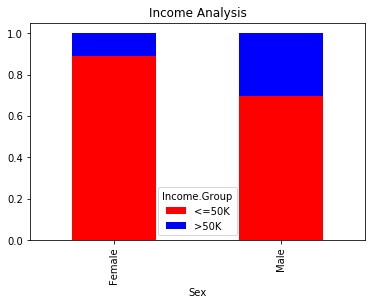

In [25]:
cross_tab2.iloc[:-1,:-1].plot(kind='bar', stacked=True, color=['red','blue'], grid=False, title='Income Analysis')

### Analysis of Continous vs Continous variables

In [26]:
train.dtypes

ID                 int64
Age                int64
Workclass         object
Education         object
Marital.Status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Hours.Per.Week     int64
Native.Country    object
Income.Group      object
dtype: object

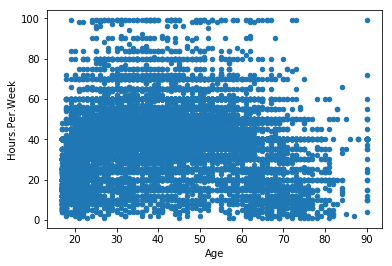

In [27]:
train.plot('Age','Hours.Per.Week', kind='Scatter')

### Analysis of Categorical vs Continous variables

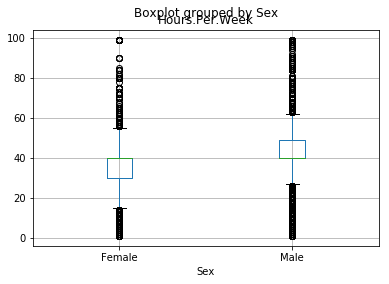

In [28]:
train.boxplot(column='Hours.Per.Week',by='Sex')  

In [29]:
train.median()

ID                16281.0
Age                  37.0
Hours.Per.Week       40.0
dtype: float64

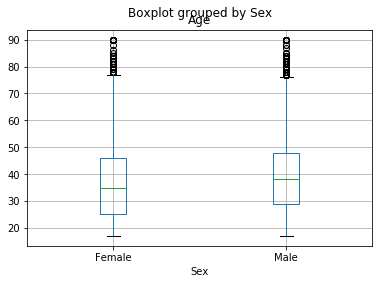

In [30]:
train.boxplot(column='Age',by='Sex')

In [31]:
train.describe()

,ID,Age,Hours.Per.Week
count,32561.000000,32561.000000,32561.000000
mean,16281.000000,38.581647,40.437456
std,9399.695394,13.640433,12.347429
min,1.000000,17.000000,1.000000
25%,8141.000000,28.000000,40.000000
50%,16281.000000,37.000000,40.000000
75%,24421.000000,48.000000,45.000000
max,32561.000000,90.000000,99.000000


In [32]:
df_male = train.loc[train['Sex']=='Male']

In [33]:
df_male.head()

,ID,Age,Workclass,Education,Marital.Status,Occupation,Relationship,Race,Sex,Hours.Per.Week,Native.Country,Income.Group
0,1,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
1,2,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
2,3,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
3,4,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
7,8,52,Self-emp-not-inc,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,45,United-States,>50K


In [34]:
df_male.median()

ID                16250.5
Age                  38.0
Hours.Per.Week       40.0
dtype: float64

In [35]:
df_male.describe()

,ID,Age,Hours.Per.Week
count,21790.000000,21790.000000,21790.000000
mean,16264.666223,39.433547,42.428086
std,9412.830322,13.370630,12.119755
min,1.000000,17.000000,1.000000
25%,8124.250000,29.000000,40.000000
50%,16250.500000,38.000000,40.000000
75%,24421.750000,48.000000,49.000000
max,32560.000000,90.000000,99.000000


In [36]:
#df_female = train.loc[train['Sex']=='Female']
df_female = train.loc[train.Sex == 'Female' ]
df_female.head()

,ID,Age,Workclass,Education,Marital.Status,Occupation,Relationship,Race,Sex,Hours.Per.Week,Native.Country,Income.Group
4,5,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K
5,6,37,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,40,United-States,<=50K
6,7,49,Private,9th,Married-spouse-absent,Other-service,Not-in-family,Black,Female,16,Jamaica,<=50K
8,9,31,Private,Masters,Never-married,Prof-specialty,Not-in-family,White,Female,50,United-States,>50K
12,13,23,Private,Bachelors,Never-married,Adm-clerical,Own-child,White,Female,30,United-States,<=50K


In [37]:
df_female.describe()

,ID,Age,Hours.Per.Week
count,10771.000000,10771.000000,10771.000000
mean,16314.043636,36.858230,36.410361
std,9373.416144,14.013697,11.811300
min,5.000000,17.000000,1.000000
25%,8168.500000,25.000000,30.000000
50%,16347.000000,35.000000,40.000000
75%,24417.000000,46.000000,40.000000
max,32561.000000,90.000000,99.000000


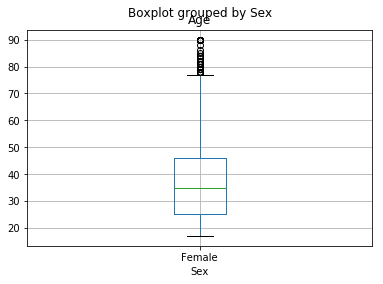

In [38]:
df_female.boxplot(column='Age',by='Sex')